# SF-DAT-21 | Unit Project 4

In this project, you will summarize and present your analysis from Unit Projects 1-3.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

## Creating a Data frame for Exploratory Data analysis

In [2]:
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


### Question 1. Introduction: Write a problem Statement/Specific Aim for this project.

Answer:The hypothesis aims for predicting admission of a student based on a dataset that includes the following features:
1)GRE
2)GPA
3)Prestiege

In terms of machine learning this is a classical Logistic Regression problem with the goal of predicting a '0' for not being Admitted and '1' Admitted

### Question 2. Dataset: Write up a description of your data and any cleaning that was completed.

Answer:**Variable** | **__ Description__** |** Type**
---|---|---
GRE|The GRE Score Of the Student|float
GPA|The GPA Score of the Student|float
Prestiege|The Ranking of the Grad school|Integer

There are 3 records that have NULL values . As part of clean up , have dropped all the rows that have NULL values in the columns

### Question 3. Demo: Provide a table that explains the data by admission status.

Mean (STD) or counts by admission status for each variable

| Not Admitted | Admitted
---| ---|---
GPA | mean(std) | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

### Calculating the mean when admitted ==1 and gre

In [18]:
#df[ (df.BuiltInYear < 1900) & (df.Size > 1500) ][ ['Address'] ]
df[(df.admit == 1) ][['gre']].mean()

gre    618.571429
dtype: float64

### Calculating the mean when admitted !=1 and gre

In [19]:
df[(df.admit != 1) ][['gre']].mean()

gre    573.579336
dtype: float64

### Calculating the mean when admitted !=1 and gpa

In [20]:
df[(df.admit != 1) ][['gpa']].mean()

gpa    3.347159
dtype: float64

### Calculating the mean when admitted ==1 and gpa

In [21]:
df[(df.admit == 1) ][['gpa']].mean()

gpa    3.489206
dtype: float64

### Prestige & Admit

In [35]:
df[(df.admit==1)].prestige.value_counts()

2.0    53
1.0    33
3.0    28
4.0    12
Name: prestige, dtype: int64

In [38]:
df[(df.admit==1)].prestige.describe()

count    126.000000
mean       2.150794
std        0.921455
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

In [36]:
df[(df.admit==0)].prestige.value_counts()

2.0    95
3.0    93
4.0    55
1.0    28
Name: prestige, dtype: int64

In [37]:
df[(df.admit==0)].prestige.describe()

count    271.000000
mean       2.645756
std        0.918922
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

| Not Admitted | Admitted
---| ---|---
GPA | 3.34 | 3.48
GRE |573| 618
Prestige 1 |10.33 | 26.19 (%)
Prestige 2 | 35.05 | 42.06 (%)
Prestige 3 | 34.31(%) | 22.22 (%)
Prestige 4 |20.29 | 9.5 (%)

### Question 4. Methods: Write up the methods used in your analysis.

Answer:Used the following approach to calculate the frequency distribution and the mean.
1)Created a temporary Data frame with Admit variable 
2)Created a series on prestige form the column of the temporary Dataframe, from Step1
3)invoked the value counts method on the series in setp 2 to get the frequency distribution

### Question 5. Results: Write up your results.

Answer:Mean GPA for students not admitted=3.34
       Mean GPA for students  admitted=3.48
       10% Pupil who did not admitted were from Prestige 1 institutes
       26.2% Pupil who got admitted were from Prestige 1 institutes
       
       35.05%% Pupil who did not  admitted were from Prestige 2 institutes
       42.05%% Pupil who got admitted were from Prestige 2 institutes
       
       34.31%% Pupil who did not admitted were from Prestige 3 institutes
       22.22%% Pupil who got admitted were from Prestige 3 institutes
       
       20.29%% Pupil who did not admitted were from Prestige 3 institutes
       9.5%% Pupil who got admitted were from Prestige 3 institutes
       


### Question 6. Visuals: Provide a table or visualization of these results.

<img src='assets/placeholder.png' height= 25% width= 25%>

<img src='assets/placeholder.png' height= 25% width= 25%>

In [41]:
 temp= df[(df.admit==0)].prestige.value_counts()

In [42]:
temp_df = pd.DataFrame({'prestige':temp.index , 'count':temp.values})

In [43]:
temp_df.head()

,count,prestige
0,95,2.0
1,93,3.0
2,55,4.0
3,28,1.0


### The Frequency distribution of prestige for students who did not get admission

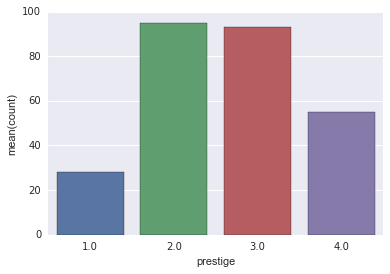

In [49]:
sns.barplot(x="prestige", y="count", data=temp_df);

In [51]:
 temp_tp= df[(df.admit==1)].prestige.value_counts()
 temp_tp_df = pd.DataFrame({'prestige':temp_tp.index , 'count':temp_tp.values})

## Frequeency distribution of prestige for students who got admitted

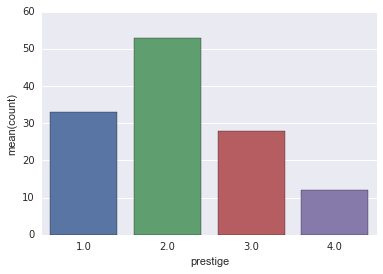

In [52]:
sns.barplot(x="prestige", y="count", data=temp_tp_df);

## Box plots depicting the mean for gre and GPA for admit==0

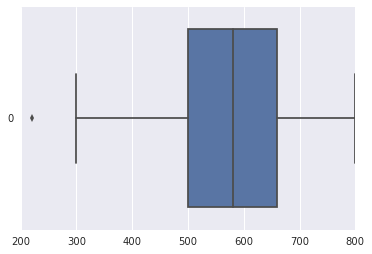

In [58]:
sns.boxplot(data=df[(df.admit==0)].gre, orient="h");

In [61]:
admit_df = df[df.admit==1]

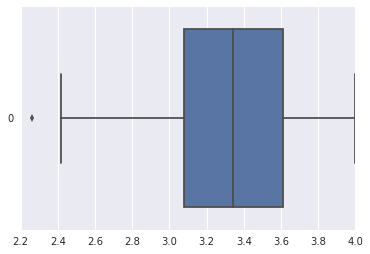

In [63]:
sns.boxplot(data=df[(df.admit==0)].gpa, orient="h");

## Distribution of Gre for students who got admitted

In [73]:
#sns.boxplot(x="day", y="total_bill", hue="time", data=tips);
#sns.boxplot(data=df, orient="h" , hue='admit');

In [75]:
scaled_df = df
scaled_df.gre = df.gre/100

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


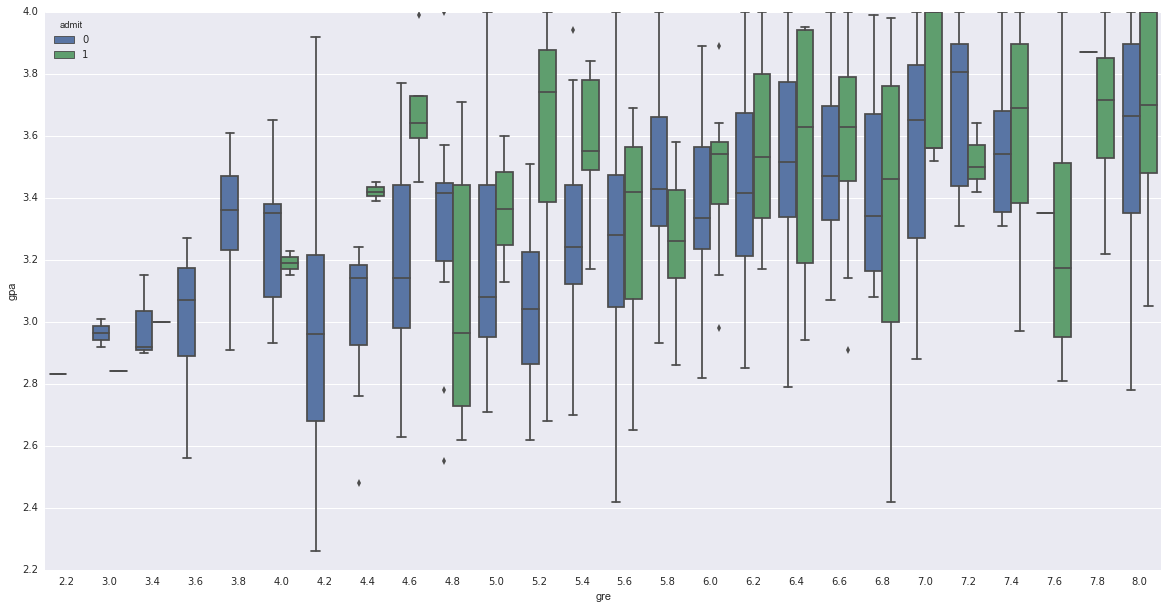

In [85]:
plt.figure(figsize=(20,10))
sns.boxplot(x="gre", y="gpa",  data=df,hue='admit');

## Distribution of GPA for students who got admitted

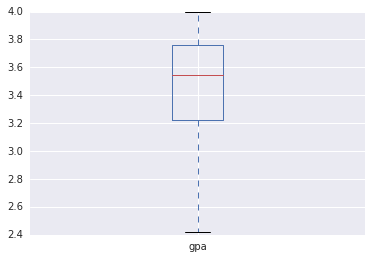

In [69]:
admit_df[['gpa']].plot(kind='box')


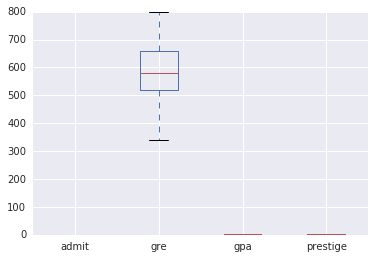

In [70]:
df.plot(kind='box')

### question 7. Discussion: Write up your discussion and future steps.

Future step could include a model and see the predictions
There are not many outliers and Null values have already been deleted. so it is safe to move ahead with the modelling and see the accuracy on the Test data 